## Task 3: Plotting Decision Boundary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
dataset = pd.read_excel("../coffeeDataSynthesized.xlsx", sheet_name="dataset")
print(dataset.columns)
X = dataset[["height", "weight"]]
y = dataset["type"]

scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X = pd.DataFrame(X_transform, columns=X.columns)
print(X)


# Encode 'type' column (robusta=0, arabica=1) manually
y = np.where(dataset["type"] == "robusta", 0, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

Index(['width', 'height', 'depth', 'weight', 'country', 'origin', 'altitude',
       'variety', 'process', 'flavor', 'acidity', 'type', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')
        height    weight
0     0.395383  1.095853
1     1.020514  1.413987
2     0.707948  0.968600
3     0.707948  1.604868
4    -1.480011  0.650466
...        ...       ...
1205 -0.873634  1.159480
1206 -0.517309  1.732121
1207 -0.204743 -0.240309
1208 -0.761110 -1.703726
1209  0.576671 -1.640099

[1210 rows x 2 columns]


In [3]:
# Meshgrid
x_min, x_max = X['height'].min() - 1, X['height'].max() + 1
y_min, y_max = X['weight'].min() - 1, X['weight'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

### 1. Train a logistic regression for your binary classification problem.

In [4]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')



Z_reg = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_reg = Z_reg.reshape(xx.shape)



Accuracy: 76.86%
Confusion Matrix:
[[90 30]
 [26 96]]


/home/furkan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


        height    weight
0     0.395383  1.095853
1     1.020514  1.413987
2     0.707948  0.968600
3     0.707948  1.604868
4    -1.480011  0.650466
...        ...       ...
1205 -0.873634  1.159480
1206 -0.517309  1.732121
1207 -0.204743 -0.240309
1208 -0.761110 -1.703726
1209  0.576671 -1.640099

[1210 rows x 2 columns]


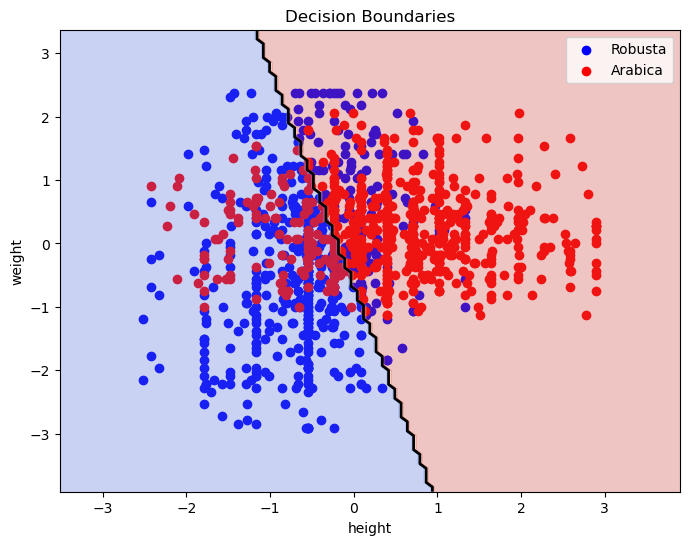

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0]['height'], X[y == 0]['weight'], color='blue', label='Robusta')
plt.scatter(X[y == 1]['height'], X[y == 1]['weight'], color='red', label='Arabica')

plt.contourf(xx, yy, Z_reg, alpha=0.3, cmap=plt.cm.coolwarm)

plt.contour(xx, yy, Z_reg, levels=[0.5], linewidths=2, colors='black')

plt.xlabel('height')
plt.ylabel('weight')
plt.title('Decision Boundaries')

plt.legend()
print(X)
plt.show()

### 2. Train a linear soft-margin SVM for your binary classification problem.

In [7]:
svm = SVC(kernel='linear', C=0.1)
clf = svm.fit(X, y)


# Predict probabilities for logistic regression and decision function for SVM
Z_svm = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)



/home/furkan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/tmp/ipykernel_226403/2044973131.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_svm, levels=[0], colors='purple', linestyles='-', label='SVM Boundary')


739


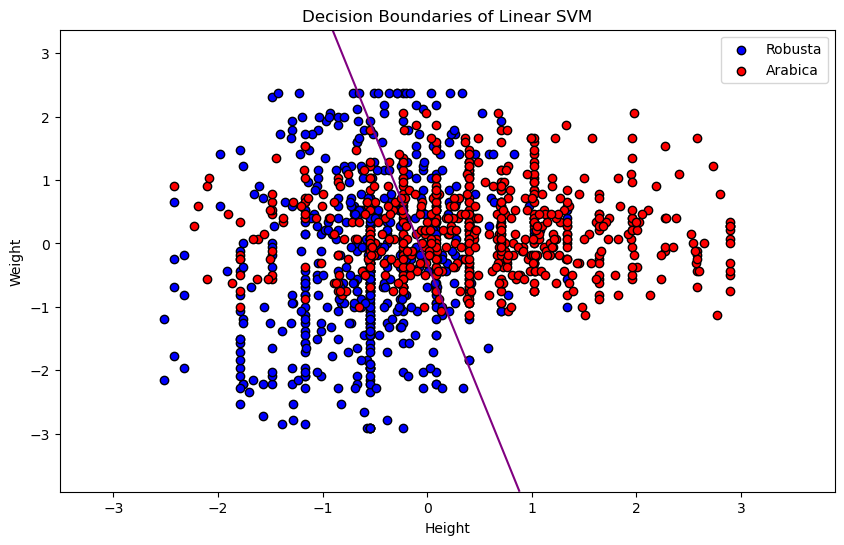

In [8]:
# Plot training data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0]["height"], X[y == 0]["weight"], color='blue', label='Robusta', edgecolor='k')
plt.scatter(X[y == 1]["height"], X[y == 1]["weight"], color='red', label='Arabica', edgecolor='k')
print(len(svm.support_vectors_))

# Plot decision boundaries
plt.contour(xx, yy, Z_svm, levels=[0], colors='purple', linestyles='-', label='SVM Boundary')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundaries of Linear SVM')

plt.legend()

plt.show()

/home/furkan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_226403/3056543709.py:9: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z_reg, levels=[0], linewidths=2, colors='black')
/tmp/ipykernel_226403/3056543709.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_svm, levels=[-1,0,1], colors='purple',linewidths=(1,2,1), linestyles=('--','-','--'), label='SVM Boundary')


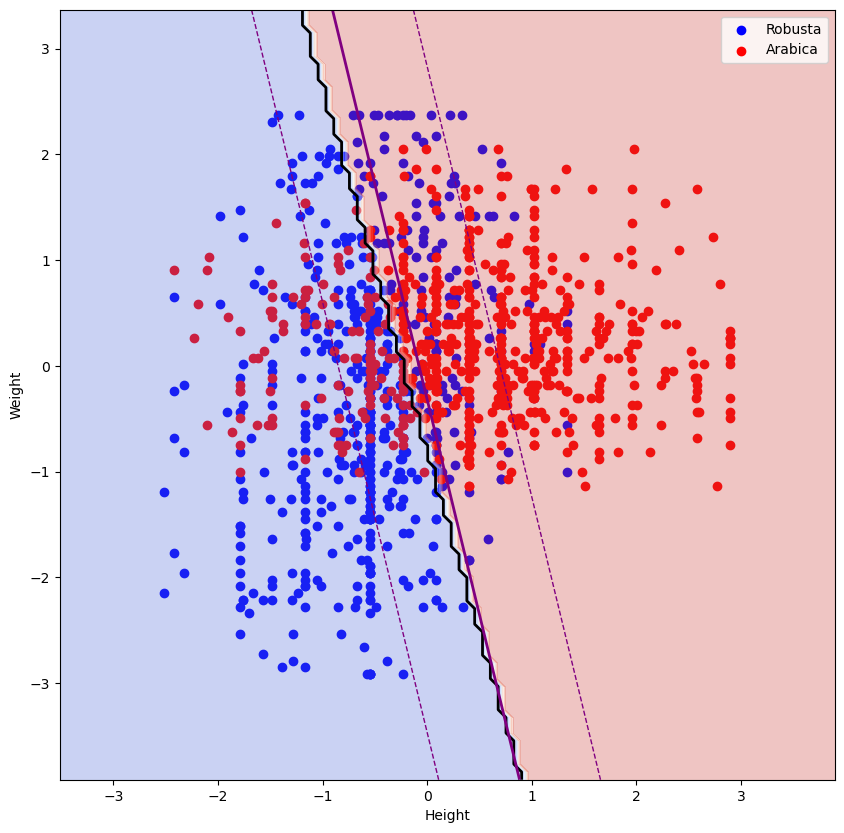

In [9]:

Z_reg = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_reg = Z_reg.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.scatter(X[y == 0]['height'], X[y == 0]['weight'], color='blue', label='Robusta')
plt.scatter(X[y == 1]['height'], X[y == 1]['weight'], color='red', label='Arabica')

plt.contourf(xx, yy, Z_reg, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_reg, levels=[0], linewidths=2, colors='black')

plt.contour(xx, yy, Z_svm, levels=[-1,0,1], colors='purple',linewidths=(1,2,1), linestyles=('--','-','--'), label='SVM Boundary')

plt.xlabel('Height')
plt.ylabel('Weight')




plt.legend()

plt.show()

